<a href="https://colab.research.google.com/github/WiringIt/MLAlgosFromScratch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1. Import numpy library and name it as np


In [ ]:
import numpy as np

**Linear Regression**

y=wx+b where w is the weight and b is the bias

1.Why do we need self? It acts like a constructor, whenerver we're creating an instance of the Linear_Regression class, that 'self' param is called.

2.Learning_rate and no_of_iterations are the 'hyperparameters'(can be changed manually) to our model and weight and bias are the 'parameters' to our model


In [ ]:
class Linear_Regression():
  #initialisation of learningrate and no.ofIterations
  def __init__(self,learning_rate,no_of_iterations):#this funciton is gonna be used implicitly
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,X,Y):#x is years of exp and y is salary
     #here we have only one feature(n)
     #no of data points is m
     self.m,self.n=X.shape #no of rows and cols ie, no of data points and no of features
     self.w=np.zeros(self.n)
     self.b=0
     self.X=X
     self.Y=Y
     for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):#update weights based on gradient descent
      Y_prediction=self.predict(self.X)
      #calculate the gradients
      dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m # T implies taking a transpose
      db=-2*np.sum(self.Y-Y_prediction)/self.m
      #updating the weight
      self.w=self.w-self.learning_rate*dw
      self.b=self.b-self.learning_rate*db

  def predict(self,X):
    return X.dot(self.w)+self.b

In [ ]:
#import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Pre Processing


In [ ]:
salary_data=pd.read_csv('/content/salary_data.csv')
salary_data.shape

(30, 2)

In [ ]:
salary_data.isnull().sum()#counts the number of missing values in each column

,0
YearsExperience,0
Salary,0


Separate the feature and target

In [ ]:
X=salary_data.iloc[:,:-1].values
Y=salary_data.iloc[:,1].values
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

Training the linear regression model

In [ ]:
model=Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
#printing the model params
print('weight: ',model.w[0])
print('bias: ',model.b)

weight:  9514.400999035135
bias:  23697.406507136307


Prediction using test data

In [ ]:
test_data_predictions=model.predict(X_test)
print(test_data_predictions)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualising prediction vs actual values

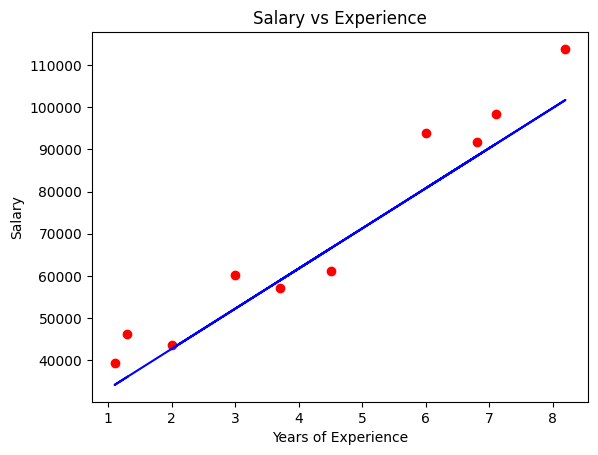

In [ ]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_predictions,color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()